# About Dataset


Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

<details>
    
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.\

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

1https://archive.ics.uci.edu/ml/datasets/Housing12320.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s
    
    </details>

In [369]:
# importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge , Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

In [370]:
# Reading dataset 
df = pd.read_csv('housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


data was saved in one column and without headers 

let's read each feature in a separate column and give it a header 


In [371]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  B - 1000  506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [373]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


by studying the description we find out that :

1-in some features mean is so different from the median, it means that data has outliers 

2- in some data, min and median and max has so faraway values from  each other, it means that data is skewed 

let's plot a boxplot for each feature and see  

In [374]:
# may the columns with categerecal valuesd have one value and it will be not helpfull 
droped_columns_2=[]
for col , num in zip( df.astype('object').nunique().index,df.astype('object').nunique().values):
    if num ==1:
        droped_columns_2.append(col)
        
droped_columns_2 

[]

# Outliers

Maybe we will use a model that can treat the outliers as the data is small

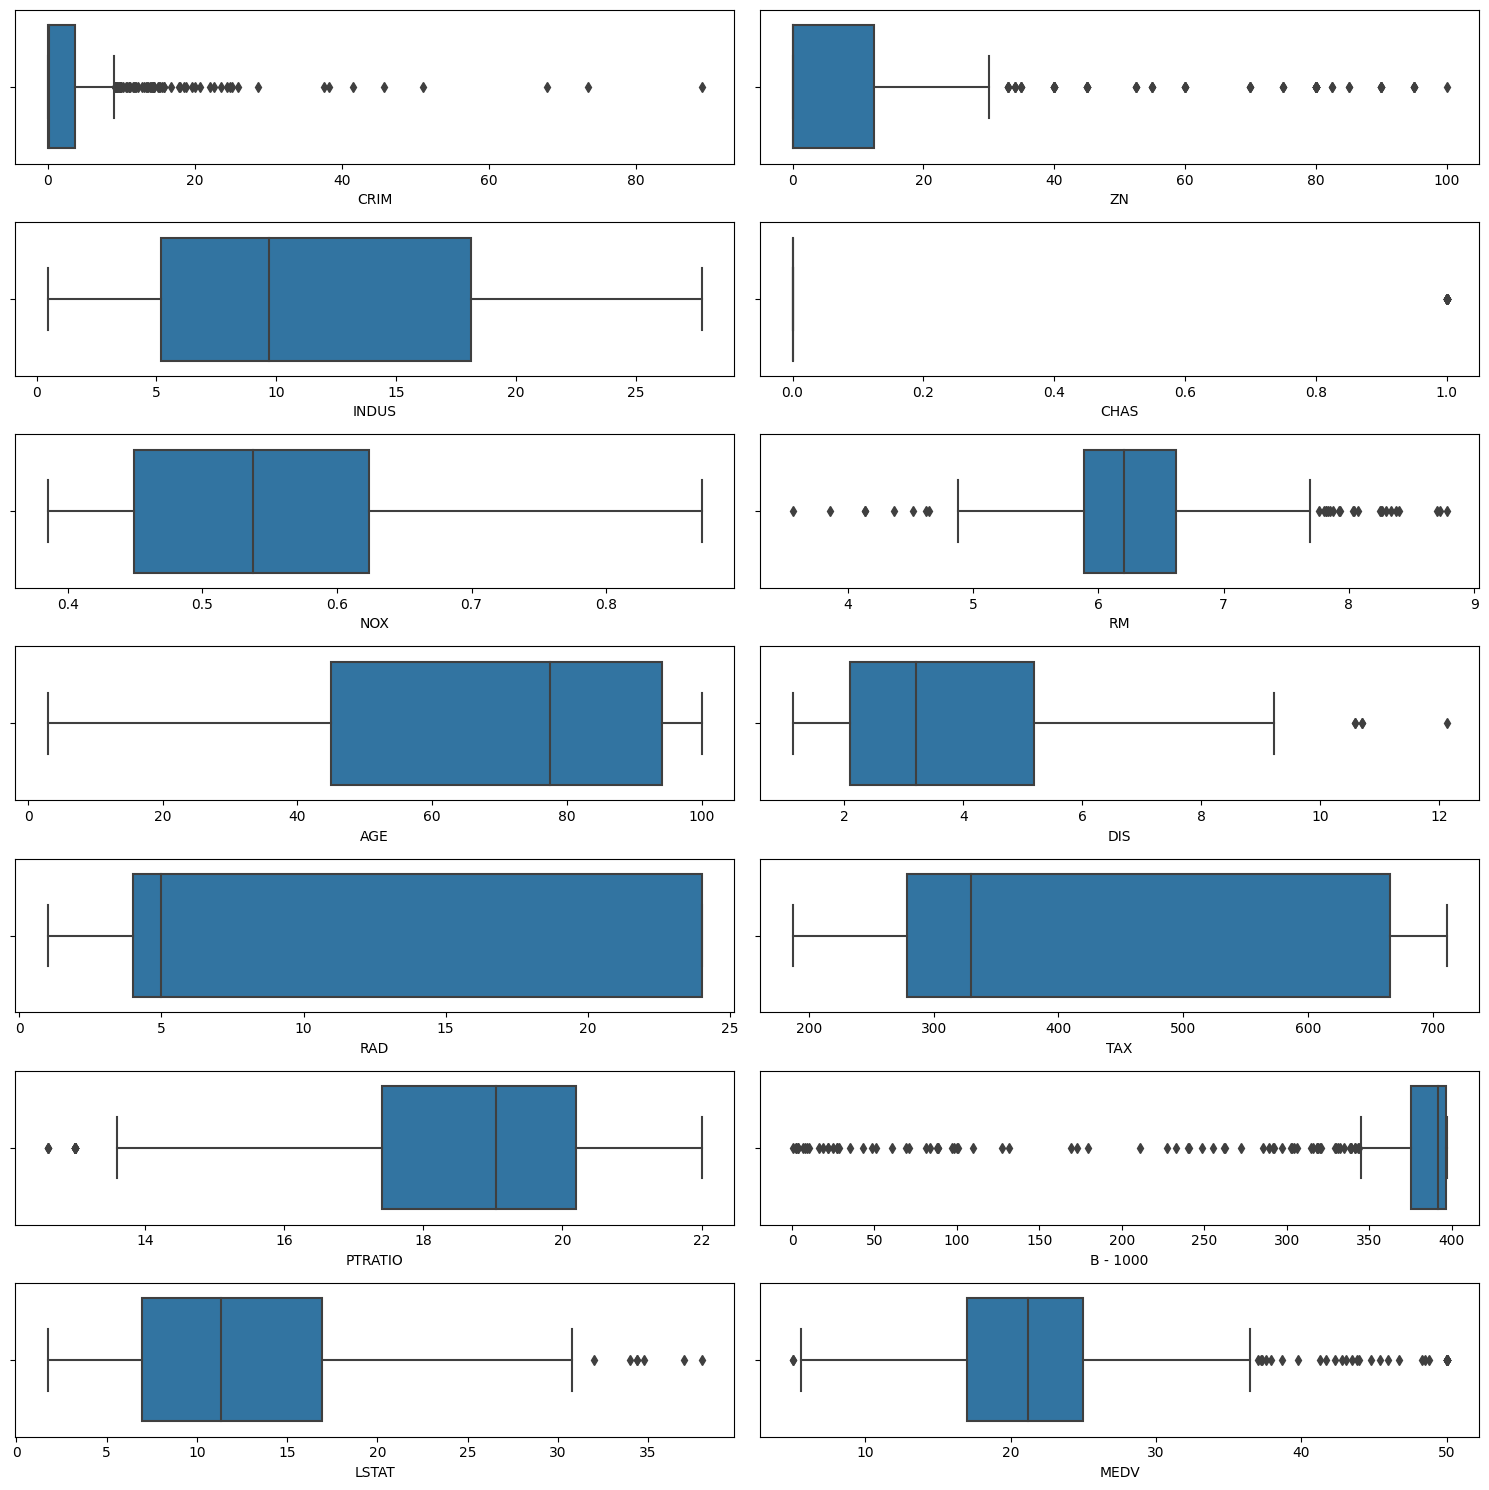

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV']


In [375]:
# Outliers
cum=[]
fig,axs=plt.subplots(7,2,figsize=(15,15))
axs=axs.flatten()
for i,column in enumerate(df.columns) :
    sns.boxplot(x=column,data=df,ax=axs[i])
    cum.append(column)
fig.tight_layout()
plt.show()
print(cum)

    features like ['CRIM', 'ZN',  'CHAS',  'RM','DIS', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV'] have outliers
    
`CHAS` refere to categorical values so dont take it 

I will not delete them as the data has many outliers and data is small as I told you before

In [376]:
# how to deal outliers 
mask1=df['RM']>4.7
mask2=df['RM']<7.8
mask3=df['LSTAT']<32
mask4=df['MEDV']<37
#df=df[mask1&mask2 &mask4]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [377]:
df.shape

(506, 14)

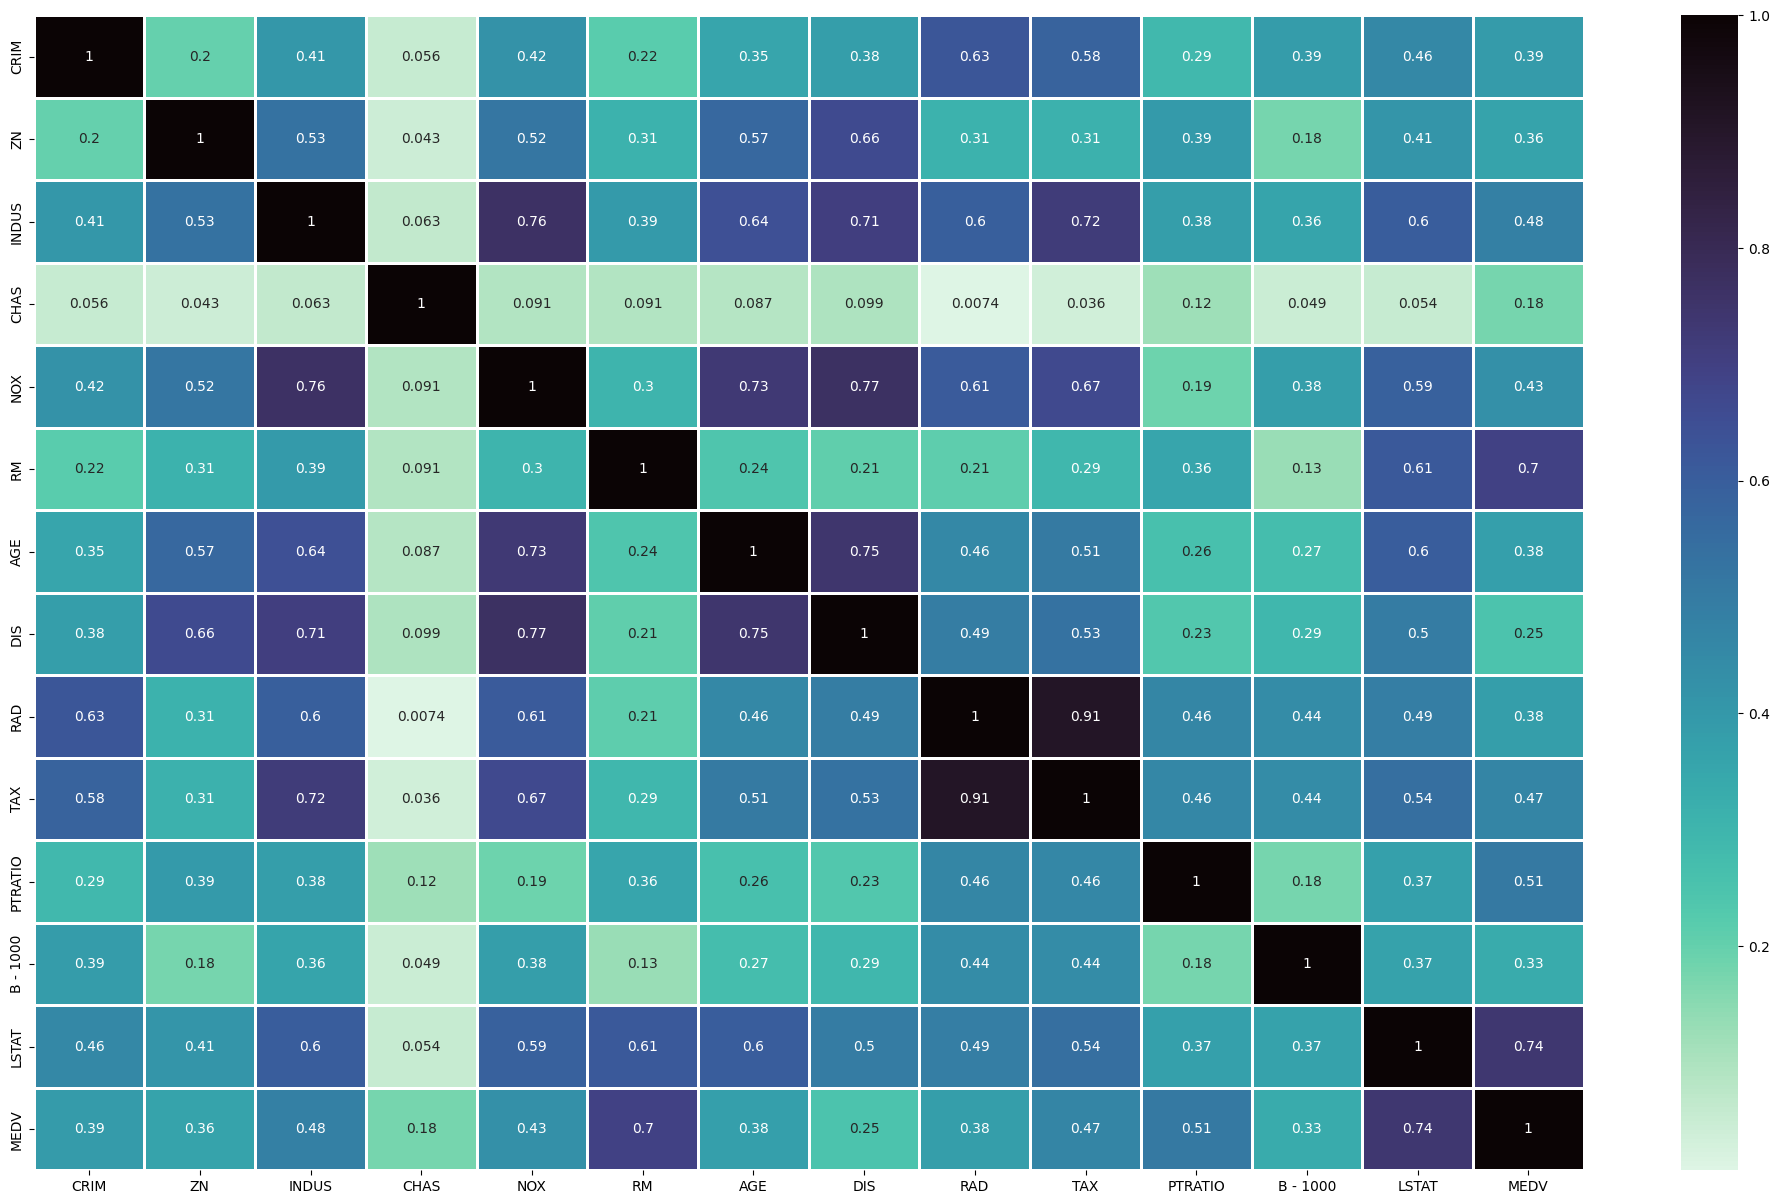

In [378]:
corr=df.corr().abs()
plt.figure(figsize = (25,15))

ax = sns.heatmap(corr, annot=True, linewidths=0.8,cmap='mako_r')

Removing features that have no correlation with target 

also `RAD` and `TAX` are highly correlated so we'll drop one of them, and it will be **RAD** as **TAX** is more correlated with `MEDV`

Text(0.5, 1.0, 'TAX and MEDV correlation')

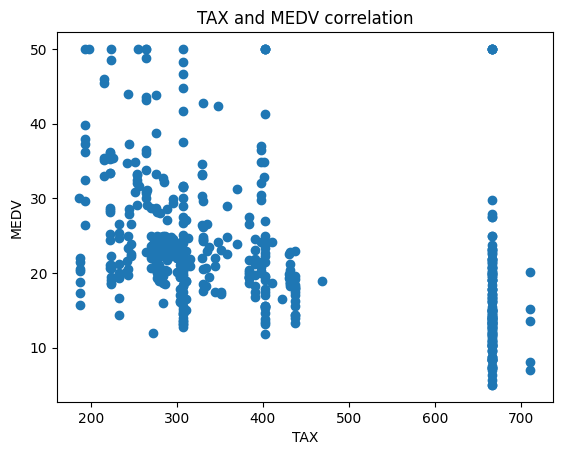

In [379]:
plt.scatter(df['TAX'],df['MEDV'])
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.title('TAX and MEDV correlation')

In [380]:
df.drop(columns='RAD',inplace=True)

In [381]:
df.drop(columns=[ 'CRIM','ZN','DIS','PTRATIO','B - 1000'],inplace=True)

In [382]:
df.columns

Index(['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT', 'MEDV'], dtype='object')

# Skewed Data 

In [383]:
df.skew().sort_values(ascending=False)

CHAS     3.405904
MEDV     1.108098
LSTAT    0.906460
NOX      0.729308
TAX      0.669956
RM       0.403612
INDUS    0.295022
AGE     -0.598963
dtype: float64

In [384]:
for col in df.drop(columns='CHAS').columns:
    if np.abs(df[col].skew()) > 0.5:
        df[col] = np.log1p(df[col])
 

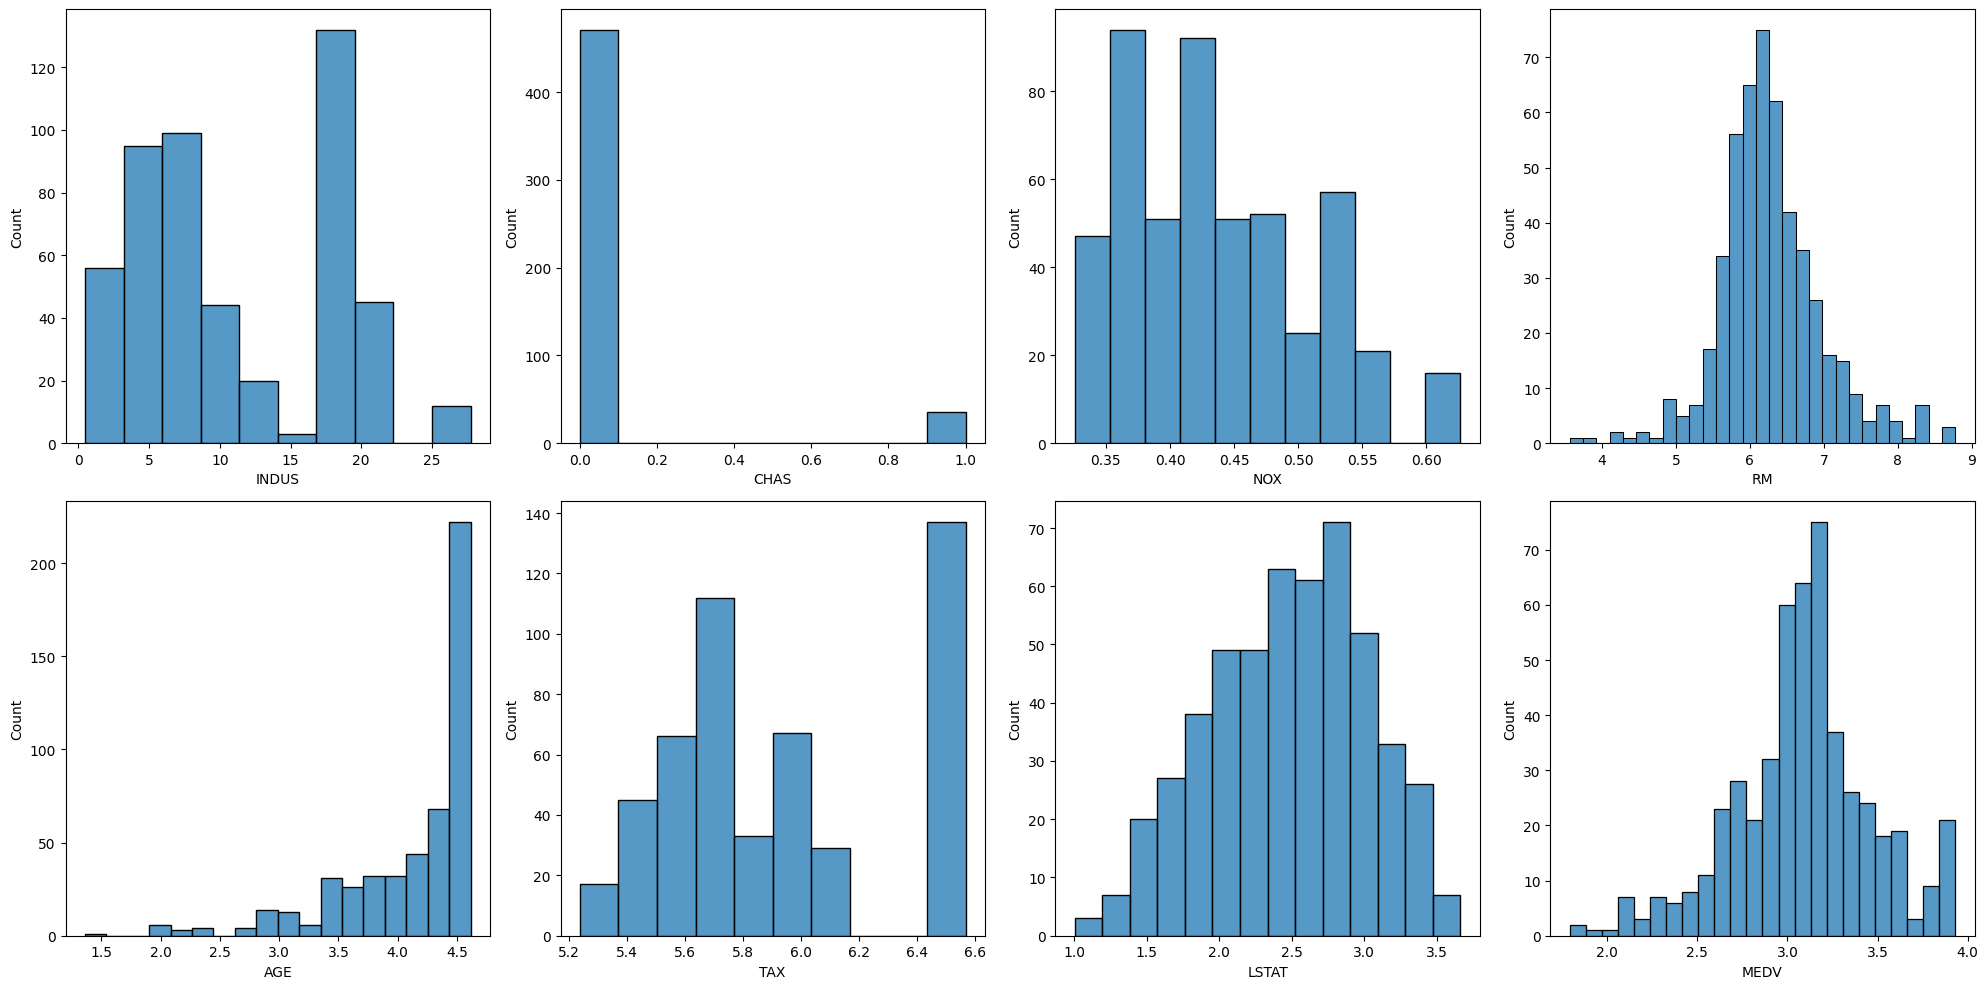

['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']


In [385]:
cum=[]
fig,axs=plt.subplots(2,4,figsize=(20,10))
axs=axs.flatten()
for i,column in enumerate(df.columns) :
    sns.histplot(x=column,data=df,ax=axs[i])
    cum.append(column)
fig.tight_layout()
plt.show()
print(cum)

# Build Model

# Split data

In [386]:
y=df['MEDV']
X=df.drop(columns='MEDV')


In [387]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Fitting a model and Hyperparameter tuning

the data has a small length of rows so let's try a Model dealing with this and with `Outliers`

In [388]:
# Hyper parameters range intialization for tuning 
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [389]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [390]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [391]:
from datetime import datetime

# start_time=timer(None)

# tuning_model.fit(X_train,y_train)

# timer(start_time)
# used to find best params 

In [393]:
# best hyperparameters 
tuning_model.best_params_

In [ ]:
# best model score
tuning_model.best_score_

In [394]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=12,max_features='log2',max_leaf_nodes=30,min_samples_leaf=9,min_weight_fraction_leaf=0.1,splitter='best')

In [395]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, max_features='log2', max_leaf_nodes=30,
                      min_samples_leaf=9, min_weight_fraction_leaf=0.1)

In [396]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

## check the accuracy


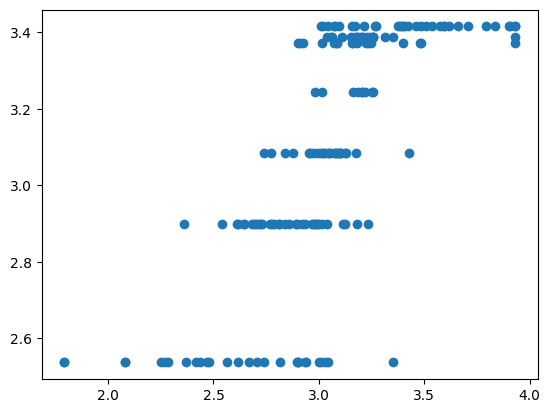

In [397]:
plt.scatter(y_test,tuned_pred)

In [398]:
print('MAE:', mean_absolute_error(y_test,tuned_pred))
print('MSE:', mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, tuned_pred)))

MAE: 0.20580856355747867
MSE: 0.06944404585780146
RMSE: 0.26352238208129775


fantastic 😎🤩

Thanks for reading 😘😘